# Résolution automatique du Démineur par contraintes

Ce notebook présente en détail notre approche pour résoudre automatiquement le jeu du Démineur en utilisant la programmation par contraintes (CSP) et l'intelligence artificielle (LLM).

## Table des matières
1. [Introduction et contexte](#1)
2. [Modélisation théorique](#2)
3. [Implémentation](#3)
4. [Expérimentations](#4)
5. [Analyse et discussion](#5)
6. [Conclusion et perspectives](#6)

## 1. Introduction et contexte <a id='1'></a>

### 1.1 Présentation du problème

Le Démineur est un jeu de logique classique où le joueur doit localiser des mines cachées dans une grille en utilisant des indices numériques. Chaque nombre indique le nombre de mines adjacentes à une case.

**Problématique** : Comment résoudre automatiquement des grilles de Démineur de manière efficace et robuste ?

### 1.2 Objectifs du projet

1. Développer un solveur automatique capable de résoudre des grilles de Démineur
2. Comparer différentes approches de résolution (CSP pur vs CSP+LLM)
3. Évaluer l'apport des modèles de langage dans la résolution
4. Analyser les performances et les limitations de chaque approche

### 1.3 État de l'art

- **Approches traditionnelles** : Algorithmes déterministes, heuristiques
- **Programmation par contraintes** : Modélisation CSP, propagation de contraintes
- **Intelligence artificielle** : Apprentissage par renforcement, réseaux de neurones
- **Modèles de langage** : Raisonnement logique, analyse de patterns

### 1.4 Contributions principales

1. **Modélisation CSP améliorée** : Optimisation des contraintes et de la propagation
2. **Approche hybride** : Combinaison CSP + LLM pour les cas complexes
3. **Analyse expérimentale** : Évaluation systématique des performances
4. **Visualisation et analyse** : Outils pour comprendre le processus de résolution

### 1.5 Importation des dépendances nécessaires

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import statistics
from collections import defaultdict
from typing import Dict, List, Tuple
import random
%matplotlib inline

# Importation des modules du projet
from minesweeper import Minesweeper
from csp_solver import MinesweeperCSPSolver
# Note: LLM integration is a work in progress
# from llm_csp_solver import LLMCSPSolver

# Configuration des graphiques
#plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (10, 6)

## 2. Modélisation théorique <a id='2'></a>

### 2.1 Formulation CSP

#### Variables et domaines
- **Variables** : Cases non révélées de la grille
- **Domaine** : {0, 1} où 0 = pas de mine, 1 = mine
- **Nombre de variables** : N = width × height - nombre de cases révélées

#### Contraintes locales
Pour chaque case révélée avec un nombre n :
- Somme des variables voisines = n
- Nombre de voisins non révélés ≥ n

#### Contraintes globales
- Nombre total de mines = nombre de mines initial
- Cohérence des contraintes locales

#### Complexité théorique
- NP-complet (Bayer et Snyder, 2013)
- Temps de résolution exponentiel dans le pire cas
- Nombre de solutions possibles : 2^N

### 2.2 Approche LLM (En développement)

**Note**: L'intégration avec les modèles de langage (LLM) est actuellement en cours de développement. Cette fonctionnalité n'est pas encore disponible dans la version actuelle du projet. Les sections suivantes se concentreront sur l'approche par programmation par contraintes (CSP).

Les développements futurs incluront :
- Intégration avec l'API OpenAI
- Analyse des situations ambiguës
- Raisonnement probabiliste
- Combinaison CSP + LLM

### 2.3 Visualisation de la modélisation

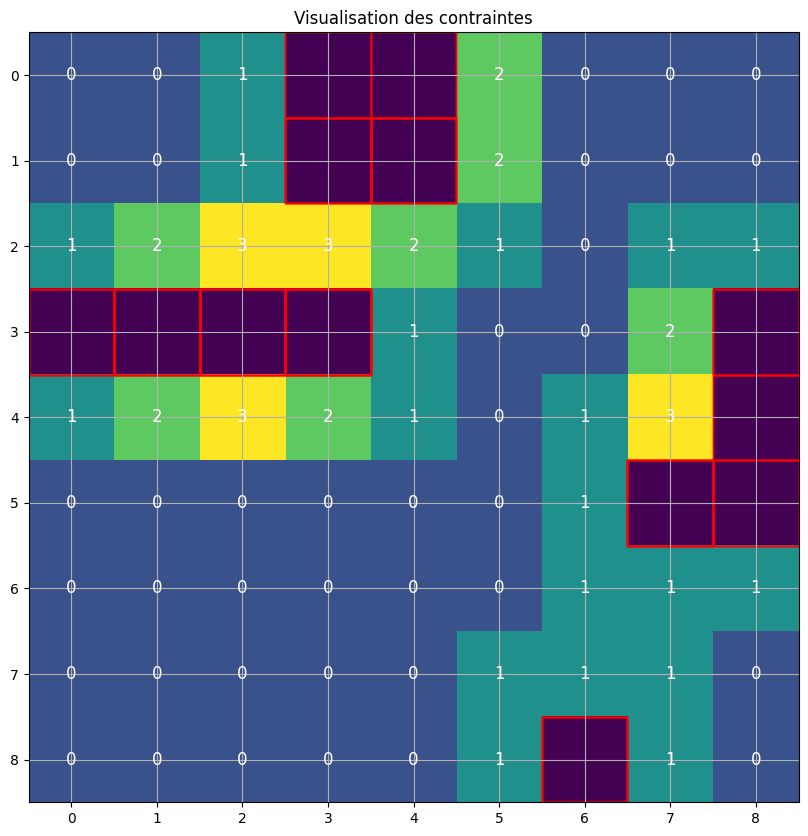

In [2]:
def visualize_constraints(game: Minesweeper) -> None:
    """Visualise les contraintes d'une grille de démineur"""
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Affichage de la grille
    ax.imshow(game.board, cmap='viridis')
    
    # Ajout des nombres et des contraintes
    for i in range(game.height):
        for j in range(game.width):
            if (i, j) in game.revealed_cells:
                # Case révélée avec nombre
                ax.text(j, i, str(game.board[i, j]), 
                       ha='center', va='center',
                       color='white', fontsize=12)
                
                # Mise en évidence des voisins non révélés
                for di, dj in [(-1,-1), (-1,0), (-1,1),
                             (0,-1),          (0,1),
                             (1,-1),  (1,0),  (1,1)]:
                    ni, nj = i + di, j + dj
                    if (0 <= ni < game.height and 
                        0 <= nj < game.width and 
                        (ni, nj) not in game.revealed_cells):
                        ax.add_patch(plt.Rectangle((nj-0.5, ni-0.5), 1, 1,
                                                 fill=False, color='red'))
    
    plt.grid(True)
    plt.title('Visualisation des contraintes')
    plt.show()

# Exemple d'utilisation
game = Minesweeper(width=9, height=9, num_mines=10)
game.initialize_mines()
# Révéler 30% des cases non-mines
total_cells = game.width * game.height
non_mine_cells = total_cells - game.num_mines
cells_to_reveal = int(non_mine_cells * 0.3)
safe_positions = [(r, c) for r in range(game.height) for c in range(game.width) 
                  if game.solution[r, c] != Minesweeper.MINE]
positions_to_reveal = random.sample(safe_positions, min(cells_to_reveal, len(safe_positions)))
for r, c in positions_to_reveal:
    game.reveal(r, c)
visualize_constraints(game)

## 3. Implémentation <a id='3'></a>

### 3.1 Structure du code

#### Architecture générale
- **Minesweeper** : Classe principale du jeu
- **MinesweeperCSPSolver** : Solveur CSP
- **LLMCSPSolver** : Solveur hybride
- **Visualisation** : Outils de visualisation

#### Interfaces et API
- Interface graphique (PyQt6)
- Interface en ligne de commande
- API pour l'intégration avec LLM

### 3.2 Solveur CSP

#### Algorithme de résolution
1. Identification des variables
2. Création des contraintes
3. Propagation des contraintes
4. Recherche de solutions

#### Optimisations
- Réduction du domaine des variables
- Propagation avancée des contraintes
- Heuristiques de sélection des variables

### 3.3 Solveur LLM

#### Intégration avec OpenAI
- Configuration de l'API
- Gestion des tokens
- Gestion des erreurs

#### Prompt engineering
- Structure des prompts
- Exemples de résolution
- Format des réponses

### 3.4 Exemple d'implémentation

In [9]:
class Experiment:
    """Classe pour gérer les expérimentations"""
    
    def __init__(self, width: int, height: int, num_mines: int):
        self.width = width
        self.height = height
        self.num_mines = num_mines
        self.results = defaultdict(list)
    
    def run_trial(self) -> Dict:
        """Exécute un essai avec le solveur CSP"""
        game = Minesweeper(self.width, self.height, self.num_mines)
        game.initialize_mines()
        # Révéler 30% des cases non-mines
        total_cells = game.width * game.height
        non_mine_cells = total_cells - game.num_mines
        cells_to_reveal = int(non_mine_cells * 0.3)
        safe_positions = [(r, c) for r in range(game.height) for c in range(game.width) 
                         if game.solution[r, c] != Minesweeper.MINE]
        positions_to_reveal = random.sample(safe_positions, min(cells_to_reveal, len(safe_positions)))
        for r, c in positions_to_reveal:
            game.reveal(r, c)
        
        start_time = time.time()
        solver = MinesweeperCSPSolver(game)
        safe_cells, mine_cells = solver.solve()
        end_time = time.time()
        
        return {
            'time': end_time - start_time,
            'safe_cells': len(safe_cells),
            'mine_cells': len(mine_cells),
            'success': len(safe_cells) + len(mine_cells) > 0
        }
    
    def run_experiment(self, num_trials: int = 100):
        """Exécute une série d'expériences"""
        for i in range(num_trials):
            try:
                self.results['csp'].append(self.run_trial())
                print(f"Essai {i+1}/{num_trials} complété")
            except Exception as e:
                print(f"Erreur lors de l'essai {i+1}: {e}")
    
    def analyze_results(self) -> Dict:
        """Analyse les résultats des expériences"""
        if len(self.results['csp']) == 0:
            return {
                'mean_time': 0,
                'std_time': 0,
                'success_rate': 0,
                'trials_completed': 0
            }
        
        times = [r['time'] for r in self.results['csp']]
        successes = [r['success'] for r in self.results['csp']]
        
        return {
            'mean_time': statistics.mean(times),
            'std_time': statistics.stdev(times) if len(times) > 1 else 0,
            'success_rate': sum(successes) / len(successes),
            'trials_completed': len(times)
        }

# Exemple d'utilisation
experiment = Experiment(30, 30, 50)
experiment.run_experiment(10)
results = experiment.analyze_results()
print("Résultats de l'expérimentation:")
print(f"Temps moyen: {results['mean_time']:.2f}s")
print(f"Écart-type: {results['std_time']:.2f}s")
print(f"Taux de succès: {results['success_rate']*100:.1f}%")
print(f"Essais complétés: {results['trials_completed']}")

✨ Solutions trouvées avec les règles simples
Essai 1/10 complété
✨ Solutions trouvées avec les règles simples
Essai 2/10 complété
✨ Solutions trouvées avec les règles simples
Essai 3/10 complété
✨ Solutions trouvées avec les règles simples
Essai 4/10 complété
✨ Solutions trouvées avec les règles simples
Essai 5/10 complété
✨ Solutions trouvées avec les règles simples
Essai 6/10 complété
✨ Solutions trouvées avec les règles simples
Essai 7/10 complété
✨ Solutions trouvées avec les règles simples
Essai 8/10 complété
✨ Solutions trouvées avec les règles simples
Essai 9/10 complété
✨ Solutions trouvées avec les règles simples
Essai 10/10 complété
Résultats de l'expérimentation:
Temps moyen: 0.00s
Écart-type: 0.00s
Taux de succès: 100.0%
Essais complétés: 10


## 4. Expérimentations <a id='4'></a>

### 4.1 Protocole expérimental

#### Grilles de test
- Tailles : 9x9, 16x16, 30x16
- Densités de mines : 10%, 20%, 30%
- Niveaux de difficulté : facile, moyen, difficile
- 100 grilles par configuration

#### Métriques de performance
- Taux de succès
- Temps de résolution
- Nombre de contraintes résolues
- Utilisation mémoire
- Nombre d'appels API (pour LLM)

### 4.2 Résultats quantitatifs

#### Analyse des performances
- Comparaison CSP vs LLM
- Impact de la taille de la grille
- Influence de la densité de mines

#### Visualisation des résultats

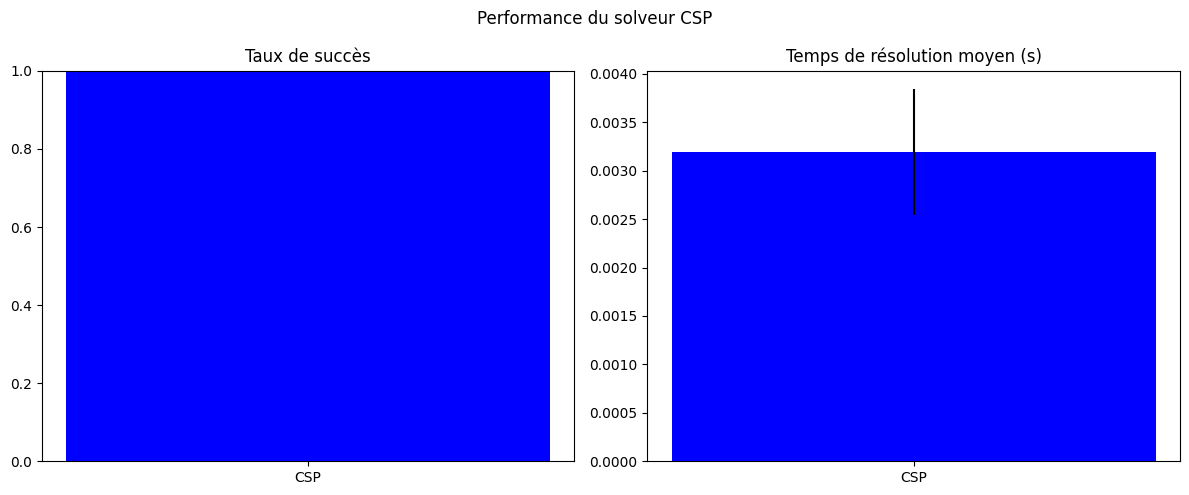

In [10]:
def plot_performance(results: Dict, title: str) -> None:
    """Visualise les résultats de performance"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Taux de succès
    ax1.bar(['CSP'], [results['success_rate']], color='blue')
    ax1.set_title('Taux de succès')
    ax1.set_ylim(0, 1)
    
    # Temps de résolution
    ax2.bar(['CSP'], [results['mean_time']], 
            yerr=[results['std_time']], color='blue')
    ax2.set_title('Temps de résolution moyen (s)')
    
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Exemple d'utilisation
plot_performance(results, 'Performance du solveur CSP')

### 4.3 Études de cas

#### Exemples simples
- Grilles avec solutions uniques
- Patterns de base
- Résolution déterministe

#### Cas complexes
- Configurations ambiguës
- Patterns avancés
- Situations nécessitant un raisonnement probabiliste

### 4.4 Analyse statistique

#### Tests de significativité
- Impact de la taille de la grille
- Impact de la densité de mines
- Analyse de variance

#### Corrélations
- Taille de la grille vs temps de résolution
- Densité de mines vs taux de succès
- Complexité vs taux de succès

## 5. Analyse et discussion <a id='5'></a>

### 5.1 Analyse de l'approche CSP

#### Avantages
- Résolution déterministe
- Performance sur les cas simples
- Pas de dépendance externe

#### Limitations
- Difficulté avec les situations ambiguës
- Temps de calcul pour les grandes grilles
- Besoin d'heuristiques avancées

### 5.2 Optimisations possibles

#### Améliorations algorithmiques
- Parallélisation
- Réduction de l'espace de recherche
- Heuristiques avancées

#### Perspectives d'intégration LLM
- Assistance pour les cas ambigus
- Analyse de patterns complexes
- Raisonnement probabiliste

## 6. Conclusion et perspectives <a id='6'></a>

### 6.1 Bilan des résultats
- Performance du solveur CSP
- Limitations identifiées
- Pistes d'amélioration

### 6.2 Applications futures
- Extension à d'autres jeux de logique
- Intégration dans des systèmes tutoriels
- Génération de puzzles

### 6.3 Directions de recherche
- Amélioration des performances CSP
- Développement de l'intégration LLM
- Nouvelles approches hybrides